In [84]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

ten_year_source = os.path.join('EF_Data_Sets', '2008-2019_combined.xls')
ten_year_df = pd.read_excel(ten_year_source)

ten_year_df.count()

name                      2219
index year                2219
overall score             2124
property rights           2151
government integrity      2167
judicial effectiveness     554
tax burden                2140
government spending       2150
fiscal health              552
business freedom          2163
labor freedom             2161
monetary freedom          2154
trade freedom             2143
investment freedom        2155
financial freedom         2138
dtype: int64

In [85]:
current_year_source = os.path.join('EF_Data_Sets', 'index2019_data.xls')

region_col = [1, 3]
region_df = pd.read_excel(current_year_source, usecols = region_col)
region_df.rename(columns = {"Country Name": "name", "Region": "region"}, inplace = True)

region_df.head()

,name,region
0,Afghanistan,Asia-Pacific
1,Albania,Europe
2,Algeria,Middle East and North Africa
3,Angola,Sub-Saharan Africa
4,Argentina,Americas


In [86]:
primary_df = pd.merge(ten_year_df, region_df,  how = 'outer', on = 'name')
primary_df.count()

name                      2246
index year                2219
overall score             2124
property rights           2151
government integrity      2167
judicial effectiveness     554
tax burden                2140
government spending       2150
fiscal health              552
business freedom          2163
labor freedom             2161
monetary freedom          2154
trade freedom             2143
investment freedom        2155
financial freedom         2138
region                    1922
dtype: int64

In [87]:
primary_df.head()

,name,index year,overall score,property rights,government integrity,judicial effectiveness,tax burden,government spending,fiscal health,business freedom,labor freedom,monetary freedom,trade freedom,investment freedom,financial freedom,region
0,Afghanistan,2019.0,51.5,19.6,25.2,29.6,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0,Asia-Pacific
1,Afghanistan,2018.0,51.3,17.9,26.2,28.2,91.8,79.3,98.3,53.0,57.3,77.8,66.0,10.0,10.0,Asia-Pacific
2,Afghanistan,2017.0,48.9,12.6,27.5,28.4,91.6,79.9,97.3,54.2,59.9,69.3,66.0,0.0,0.0,Asia-Pacific
3,Afghanistan,2016.0,NaN,NaN,12.0,NaN,91.6,81.2,NaN,56.6,63.2,NaN,NaN,55.0,NaN,Asia-Pacific
4,Afghanistan,2015.0,NaN,NaN,8.0,NaN,91.7,81.2,NaN,61.4,67.5,72.6,NaN,55.0,NaN,Asia-Pacific


In [88]:
biz_df = primary_df[["name", "index year", "overall score", "business freedom"]]
biz_df.head()

,name,index year,overall score,business freedom
0,Afghanistan,2019.0,51.5,49.2
1,Afghanistan,2018.0,51.3,53.0
2,Afghanistan,2017.0,48.9,54.2
3,Afghanistan,2016.0,NaN,56.6
4,Afghanistan,2015.0,NaN,61.4


In [89]:
biz_df2 = biz_df.dropna(how='any')

In [90]:
biz_df2.count()

name                2124
index year          2124
overall score       2124
business freedom    2124
dtype: int64

In [91]:
biz_df2.head()

,name,index year,overall score,business freedom
0,Afghanistan,2019.0,51.5,49.2
1,Afghanistan,2018.0,51.3,53.0
2,Afghanistan,2017.0,48.9,54.2
12,Albania,2019.0,66.5,69.3
13,Albania,2018.0,64.5,69.1


In [92]:
biz_df2

,name,index year,overall score,business freedom
0,Afghanistan,2019.0,51.5,49.2
1,Afghanistan,2018.0,51.3,53.0
2,Afghanistan,2017.0,48.9,54.2
12,Albania,2019.0,66.5,69.3
13,Albania,2018.0,64.5,69.1
14,Albania,2017.0,64.4,79.3
15,Albania,2016.0,65.9,67.6
16,Albania,2015.0,65.7,70.6
17,Albania,2014.0,66.9,78.1
18,Albania,2013.0,65.2,81.0


In [93]:
#Import the 2010 and 2019 datasets
data_2010 = os.path.join('EF_Data_Sets', 'index2010_data.xls')
data_2019 = os.path.join('EF_Data_Sets', 'index2019_data.xls')

df_2010 = pd.read_excel(data_2010)
df_2019 = pd.read_excel(data_2019)
df_2019.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,69.6,2.505,2.9,1957.58,8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,36,3.900,2.5,12506.6,13.9,2.0,1119.1,71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,632.9,2.000,3.1,15237.2,10,5.6,1203.0,25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,190.3,0.700,2.9,6752.58,8.2,31.7,-2254.5,65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,920.2,2.900,0.7,20875.8,8.7,25.7,11857.0,52.6


In [94]:
# Rename the columns and merge the DataFrames together
df_2010 = df_2010[['name', 'index year', 'overall score']]
df_2019 = df_2019.rename(columns={'Country Name':'name', '2019 Score':'overall score'})
df_2019 = df_2019[['name', 'overall score']]

df_2019['year'] = '2019'
merged_df = pd.merge(df_2010, df_2019, on='name', how='left')
merged_df.count()

name               183
index year         183
overall score_x    179
overall score_y    151
year               156
dtype: int64

In [95]:
#Drop all countries with NaN since we cannot compare their scores over the last decade
merged_df = merged_df.dropna(how="any")

In [96]:
merged_df.count()

name               149
index year         149
overall score_x    149
overall score_y    149
year               149
dtype: int64

In [101]:
merged_df= merged_df.rename(columns={"index year": "year_2010", "overall score_x":"score_2010", "overall score_y": "score_2019",
                                    "year": "year_2019"})
merged_df.head()

,name,year_2010,score_2010,score_2019,year_2019
1,Albania,2010,66.0,66.5,2019
2,Algeria,2010,56.9,46.2,2019
3,Angola,2010,48.4,50.6,2019
4,Argentina,2010,51.2,52.2,2019
5,Armenia,2010,69.2,67.7,2019


In [102]:
#Reset the index
#merged_df = merged_df.reset_index(drop=True)
merged_df = merged_df.set_index(["name"])
merged_df.head()


,year_2010,score_2010,score_2019,year_2019
name,,,,
Albania,2010,66.0,66.5,2019
Algeria,2010,56.9,46.2,2019
Angola,2010,48.4,50.6,2019
Argentina,2010,51.2,52.2,2019
Armenia,2010,69.2,67.7,2019


In [113]:
#Calculate the change in score for each country from 2010 to 2019
decade_change = ((merged_df["score_2019"]/merged_df["score_2010"])-1)*100
decade_change.head()

name
Albania       0.757576
Algeria     -18.804921
Angola        4.545455
Argentina     1.953125
Armenia      -2.167630
dtype: float64

In [121]:
decade_change["Zimbabwe"]

88.78504672897196

In [114]:
# Find the top 10 change in overall score for 2019-2010
top_10 = decade_change.nlargest(10)
top_10

name
Zimbabwe           88.785047
Burma              46.049046
Seychelles         28.183716
Solomon Islands    27.272727
Guinea-Bissau      23.853211
Comoros            23.385301
Rwanda             20.304569
Belarus            18.891170
Indonesia          18.558559
Iran               17.741935
dtype: float64

In [106]:
top_10.index.tolist()

['Zimbabwe',
 'Burma',
 'Seychelles',
 'Solomon Islands',
 'Guinea-Bissau',
 'Comoros',
 'Rwanda',
 'Belarus',
 'Indonesia',
 'Iran']

In [124]:
country=(top_10.index.tolist())

In [125]:
country[0]

'Zimbabwe'

In [126]:
pct_chg=[]
for t in country:
    pct_chg.append(decade_change[t])

In [128]:
print(pct_chg)

[88.78504672897196, 46.049046321525886, 28.183716075156575, 27.27272727272727, 23.853211009174302, 23.385300668151455, 20.304568527918775, 18.891170431211492, 18.558558558558545, 17.741935483870975]


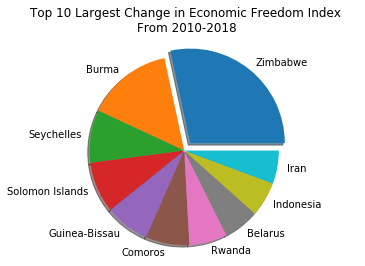

In [132]:
country=(top_10.index.tolist())
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(pct_chg, explode = explode, labels=country, shadow=True)
plt.axis("equal")
plt.title("Top 10 Largest Change in Economic Freedom Index " + "\n" + "From 2010-2018")
plt.savefig("Top10Change.png")

In [51]:
region_merge = pd.merge(merged_df, region_df,on='name', how='left')
region_merge["score_change"] = (region_merge["score_2019"]/region_merge["score_2010"]) * 100
region_merge.head()

,name,year_2010,score_2010,score_2019,year_2019,region,score_change
0,Albania,2010,66.0,66.5,2019,Europe,100.757576
1,Algeria,2010,56.9,46.2,2019,Middle East and North Africa,81.195079
2,Angola,2010,48.4,50.6,2019,Sub-Saharan Africa,104.545455
3,Argentina,2010,51.2,52.2,2019,Americas,101.953125
4,Armenia,2010,69.2,67.7,2019,Europe,97.832370


In [52]:
highest_2019 = region_merge.nlargest(15, "score_2019", keep='first')
highest_2019.reset_index(drop=True)

,name,year_2010,score_2010,score_2019,year_2019,region,score_change
0,Hong Kong,2010,89.7,90.2,2019,Asia-Pacific,100.557414
1,Singapore,2010,86.1,89.4,2019,Asia-Pacific,103.832753
2,New Zealand,2010,82.1,84.4,2019,Asia-Pacific,102.801462
3,Switzerland,2010,81.1,81.9,2019,Europe,100.986436
4,Australia,2010,82.6,80.9,2019,Asia-Pacific,97.941889
5,Ireland,2010,81.3,80.5,2019,Europe,99.015990
6,United Kingdom,2010,76.5,78.9,2019,Europe,103.137255
7,Canada,2010,80.4,77.7,2019,Americas,96.641791
8,United Arab Emirates,2010,67.3,77.6,2019,Middle East and North Africa,115.304606
9,Iceland,2010,73.7,77.1,2019,Europe,104.613297


In [53]:
# Find the top 10 change in overall score for 2019-2010
top_10_reg = region_merge.nlargest(10, "score_change", keep='first')
top_10_reg

,name,year_2010,score_2010,score_2019,year_2019,region,score_change
148,Zimbabwe,2010,21.4,40.4,2019,Sub-Saharan Africa,188.785047
21,Burma,2010,36.7,53.6,2019,Asia-Pacific,146.049046
118,Seychelles,2010,47.9,61.4,2019,Sub-Saharan Africa,128.183716
123,Solomon Islands,2010,42.9,54.6,2019,Asia-Pacific,127.272727
57,Guinea-Bissau,2010,43.6,54.0,2019,Sub-Saharan Africa,123.853211
32,Comoros,2010,44.9,55.4,2019,Sub-Saharan Africa,123.385301
112,Rwanda,2010,59.1,71.1,2019,Sub-Saharan Africa,120.304569
10,Belarus,2010,48.7,57.9,2019,Europe,118.891170
63,Indonesia,2010,55.5,65.8,2019,Asia-Pacific,118.558559
64,Iran,2010,43.4,51.1,2019,Middle East and North Africa,117.741935


In [33]:
grouped_region = top_10_reg.groupby("region")
grouped_region["score_change"].sum()

region
Asia-Pacific                    38.9
Europe                           9.2
Middle East and North Africa    10.3
Sub-Saharan Africa              65.4
Name: score_change, dtype: float64

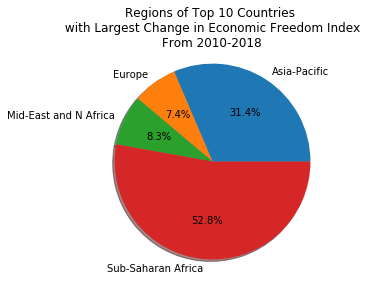

In [50]:
region=("Asia-Pacific", "Europe", "Mid-East and N Africa", "Sub-Saharan Africa")
reg_totals = (38.9, 9.2, 10.3, 65.4)
#explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(reg_totals, labels=region, autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.title("Regions of Top 10 Countries " + "\n" + " with Largest Change in Economic Freedom Index " + "\n" + "From 2010-2018")
plt.savefig("RegionsTop10.png")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

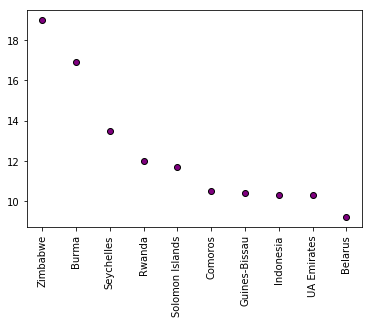